# 집값  예측 경진대회
- https://dacon.io/competitions/official/235869/overview/description

> Feature
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 

> Target
- target : 집값(달러 단위)


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('precision', 2)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rc('figure', facecolor='w', edgecolor='w')

# DataSet

In [10]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [11]:
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

In [15]:
print("Train data's shape : {}".format(df_train.shape))
print("Test data's shape : {}".format(df_test.shape))

Train data's shape : (1350, 14)
Test data's shape : (1350, 13)


In [14]:
# Null 값 전혀 없음
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [13]:
df_train.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [18]:
df_train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00
mean,6.21,1513.54,1.87,502.01,1082.64,1167.47,1.56,1972.99,1985.10,1978.47,186406.31
std,1.34,487.52,0.65,191.39,384.07,375.06,0.55,29.31,20.15,25.38,78435.42
min,2.00,480.00,1.00,100.00,105.00,480.00,0.00,1880.00,1950.00,1900.00,12789.00
25%,5.00,1144.00,1.00,368.00,816.00,886.25,1.00,1955.00,1968.00,1961.00,135000.00
50%,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,165375.00
75%,7.00,1774.50,2.00,588.00,1309.50,1396.50,2.00,2002.00,2004.00,2002.00,217875.00
max,10.00,4476.00,5.00,1488.00,2660.00,2898.00,4.00,2010.00,2010.00,2207.00,745000.00


# EDA

## Target

> 정보
- 좌측으로 편향되어 보임 -> log transformation 적용
- log transformation 했을 때 엄청 작은 값 있음. (10.5 3.3.11에서 제거!)

In [20]:
target = df_train['target']

In [21]:
target.describe()

count      1350.00
mean     186406.31
std       78435.42
min       12789.00
25%      135000.00
50%      165375.00
75%      217875.00
max      745000.00
Name: target, dtype: float64

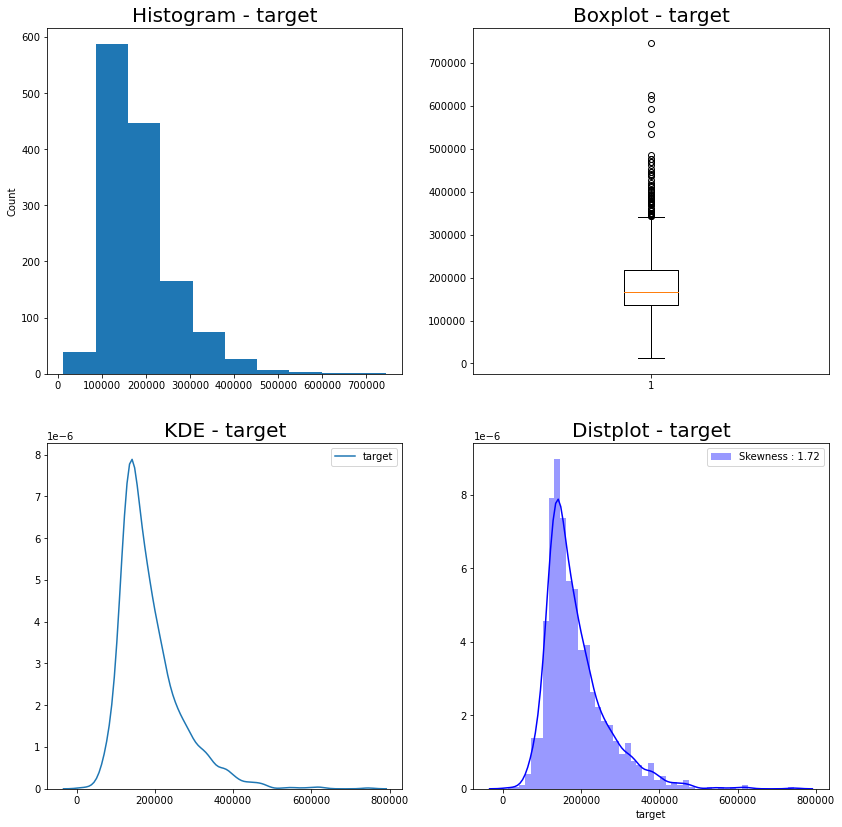

In [24]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.hist(target)
plt.title('Histogram - target', fontdict={'fontsize':20})
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(target)
plt.title('Boxplot - target', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.kdeplot(target)
plt.title('KDE - target', fontdict={'fontsize':20})

plt.subplot(2,2,4)
sns.distplot(target,
                   color='b',
                   label='Skewness : {:.2f}'.format(target.skew()))
plt.legend(loc='best')
plt.title('Distplot - target', fontdict={'fontsize':20})

plt.show()

In [25]:
# log transformation

df_train['target'] = np.log1p(df_train['target'])

In [26]:
target = df_train['target']

In [27]:
target.describe()

count    1350.00
mean       12.06
std         0.38
min         9.46
25%        11.81
50%        12.02
75%        12.29
max        13.52
Name: target, dtype: float64

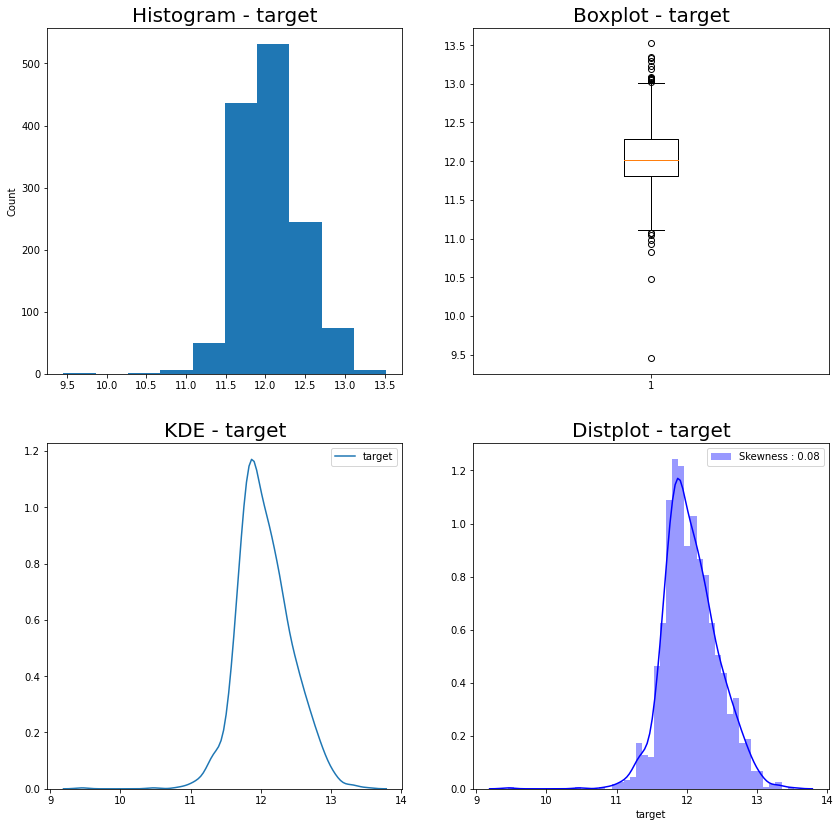

In [28]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.hist(target)
plt.title('Histogram - target', fontdict={'fontsize':20})
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(target)
plt.title('Boxplot - target', fontdict={'fontsize':20})

plt.subplot(2,2,3)
sns.kdeplot(target)
plt.title('KDE - target', fontdict={'fontsize':20})

plt.subplot(2,2,4)
sns.distplot(target,
                   color='b',
                   label='Skewness : {:.2f}'.format(target.skew()))
plt.legend(loc='best')
plt.title('Distplot - target', fontdict={'fontsize':20})

plt.show()

## Feature - type으로 분류

In [30]:
numerical_feature =  df_train.columns[df_train.dtypes!=object][:-1] # target 제외
categorical_feature = df_train.columns[df_train.dtypes==object]

print('수치형 데이터 : {}'.format(list(numerical_feature)))
print('카테고리형 데이터 : {}'.format(list(categorical_feature)))

수치형 데이터 : ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']
카테고리형 데이터 : ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


## Numerical Features

### Overall Qual

> 전반적 재료와 마감 품질
- 다른 Qual Feature들과 비교해서 차원 축소 고려

In [36]:
df_train['Overall Qual'].head()

0    10
1     7
2     5
3     5
4     7
Name: Overall Qual, dtype: int64

In [48]:
df_train['Overall Qual'].value_counts().sort_index()

2       3
3       8
4      75
5     379
6     351
7     307
8     156
9      56
10     15
Name: Overall Qual, dtype: int64

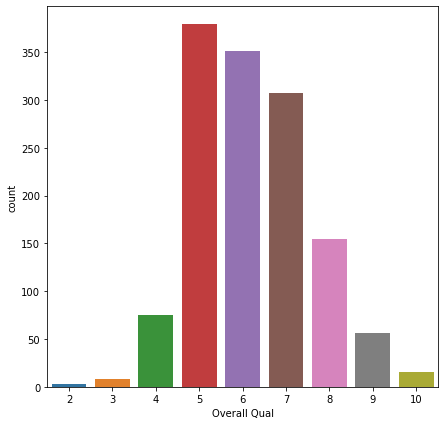

In [78]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x="Overall Qual", data=df_train)
plt.show()

### Gr Liv Area

> 지상층 생활 면적
- 왼쪽으로 편향되어 보임 -> log Transformation

In [43]:
df_train['Gr Liv Area'].head()

0    2392
1    1352
2     900
3    1174
4    1958
Name: Gr Liv Area, dtype: int64

In [64]:
df_train['Gr Liv Area'].describe()

count    1349.0
mean     1513.5
std       487.7
min       480.0
25%      1144.0
50%      1445.0
75%      1775.0
max      4476.0
Name: Gr Liv Area, dtype: float64

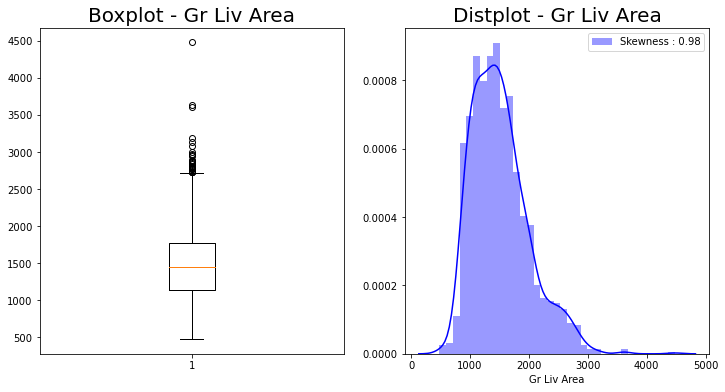

In [69]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Gr Liv Area'])
plt.title('Boxplot - Gr Liv Area', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Gr Liv Area'], color='b', label='Skewness : {:.2f}'.format(df_train['Gr Liv Area'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Gr Liv Area', fontdict={'fontsize':20})

plt.show()

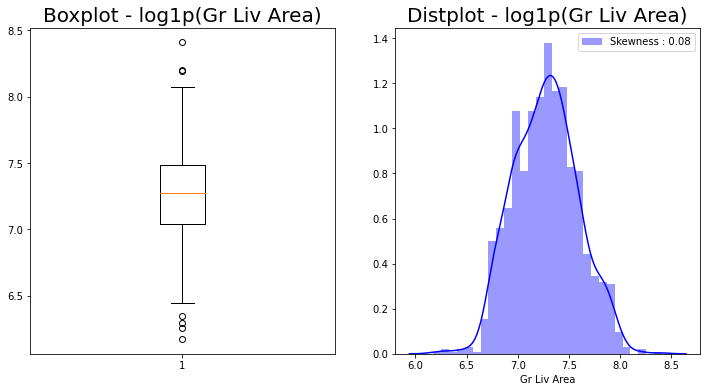

In [80]:
# log transformation
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Gr Liv Area']))
plt.title('Boxplot - log1p(Gr Liv Area)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Gr Liv Area']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Gr Liv Area']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(Gr Liv Area)', fontdict={'fontsize':20})

plt.show()

### Garage Cars

> 차고 자리 개수

In [72]:
df_train['Garage Cars'].head()

0    3
1    2
2    1
3    2
4    3
Name: Garage Cars, dtype: int64

In [73]:
df_train['Garage Cars'].value_counts()

2    793
1    372
3    172
4     11
5      1
Name: Garage Cars, dtype: int64

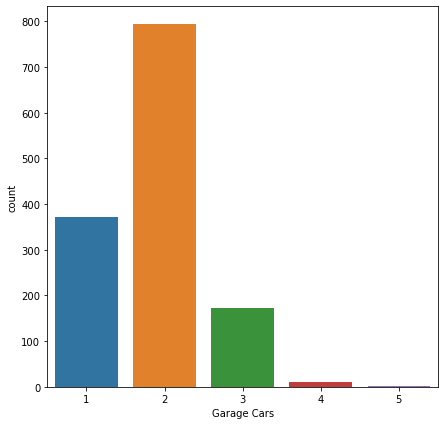

In [79]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x="Garage Cars", data=df_train)
plt.show()

### Garage Area

> 차고 면적
- 왼쪽으로 편향되어 보임 -> log transformation

In [81]:
df_train['Garage Area'].head()

0    968
1    466
2    288
3    576
4    936
Name: Garage Area, dtype: int64

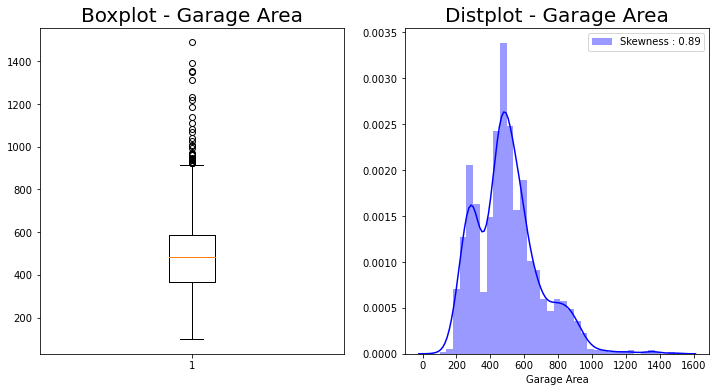

In [82]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Garage Area'])
plt.title('Boxplot - Garage Area', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Garage Area'], color='b', label='Skewness : {:.2f}'.format(df_train['Garage Area'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Garage Area', fontdict={'fontsize':20})

plt.show()

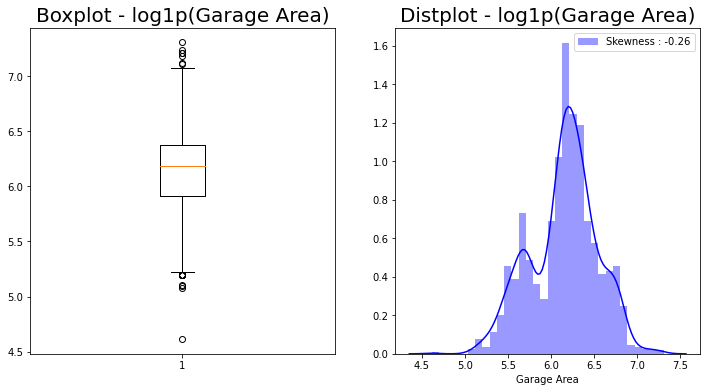

In [83]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Garage Area']))
plt.title('Boxplot - log1p(Garage Area)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Garage Area']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Garage Area']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(Garage Area)', fontdict={'fontsize':20})

plt.show()

### Total Bsmt SF

> 지하실 면적
- 편향되어 보임 -> 어떤 transformation이 좋은지 모르겠음

In [84]:
df_train['Total Bsmt SF'].head()

0    2392
1    1352
2     864
3     680
4    1026
Name: Total Bsmt SF, dtype: int64

In [94]:
pd.DataFrame(df_train['Total Bsmt SF'].describe())

,Total Bsmt SF
count,1349.0
mean,1082.3
std,384.0
min,105.0
25%,816.0
50%,1008.0
75%,1308.0
max,2660.0


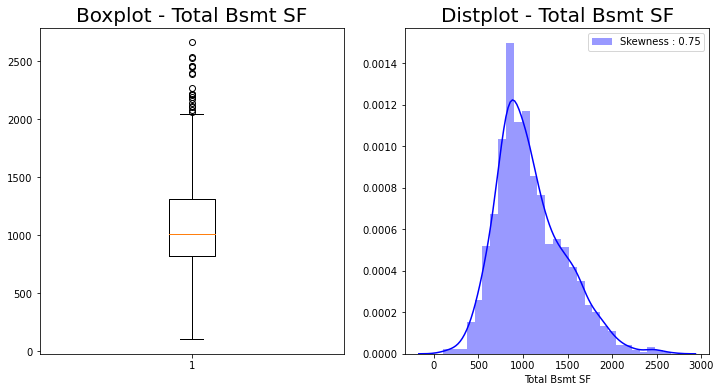

In [86]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['Total Bsmt SF'])
plt.title('Boxplot - Total Bsmt SF', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['Total Bsmt SF'], color='b', label='Skewness : {:.2f}'.format(df_train['Total Bsmt SF'].skew()))
plt.legend(loc='best')
plt.title('Distplot - Total Bsmt SF', fontdict={'fontsize':20})

plt.show()

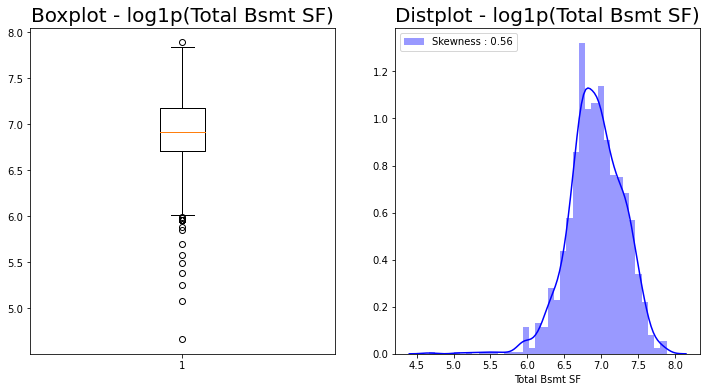

In [89]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Total Bsmt SF']))
plt.title('Boxplot - log1p(Total Bsmt SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Total Bsmt SF']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['Total Bsmt SF'].skew())))
plt.legend(loc='best')
plt.title('Distplot - log1p(Total Bsmt SF)', fontdict={'fontsize':20})

plt.show()

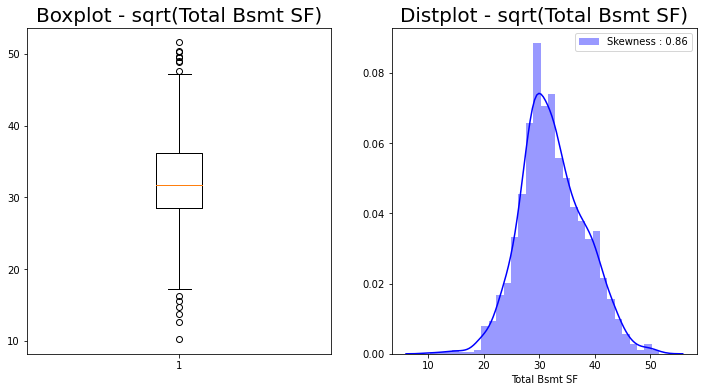

In [90]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.sqrt(df_train['Total Bsmt SF']))
plt.title('Boxplot - sqrt(Total Bsmt SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.sqrt(df_train['Total Bsmt SF']), color='b', label='Skewness : {:.2f}'.format(np.sqrt(df_train['Total Bsmt SF'].skew())))
plt.legend(loc='best')
plt.title('Distplot - sqrt(Total Bsmt SF)', fontdict={'fontsize':20})

plt.show()

### 1st Flr SF

> 1층 면적
- 왼쪽으로 편향 -> log transformation

In [91]:
df_train['1st Flr SF'].head()

0    2392
1    1352
2     900
3     680
4    1026
Name: 1st Flr SF, dtype: int64

In [95]:
pd.DataFrame(df_train['1st Flr SF'].describe())

,1st Flr SF
count,1349.00
mean,1167.18
std,375.04
min,480.00
25%,886.00
50%,1092.00
75%,1392.00
max,2898.00


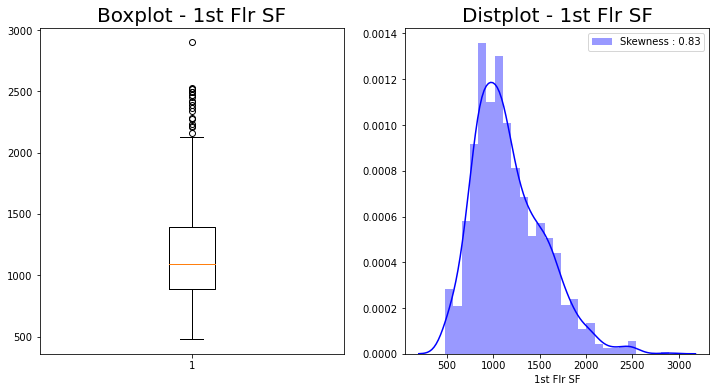

In [96]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_train['1st Flr SF'])
plt.title('Boxplot - 1st Flr SF', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(df_train['1st Flr SF'], color='b', label='Skewness : {:.2f}'.format(df_train['1st Flr SF'].skew()))
plt.legend(loc='best')
plt.title('Distplot - 1st Flr SF', fontdict={'fontsize':20})

plt.show()

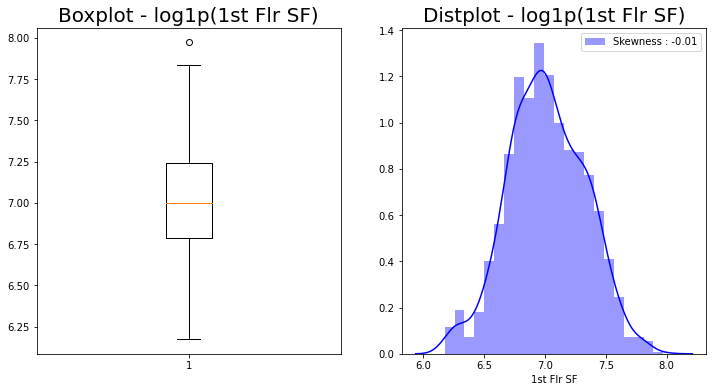

In [97]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['1st Flr SF']))
plt.title('Boxplot - log1p(1st Flr SF)', fontdict={'fontsize':20})

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['1st Flr SF']), color='b', label='Skewness : {:.2f}'.format(np.log1p(df_train['1st Flr SF']).skew()))
plt.legend(loc='best')
plt.title('Distplot - log1p(1st Flr SF)', fontdict={'fontsize':20})

plt.show()

### Full Bath

> 지상층 화장실 개수

In [104]:
df_train['Full Bath'].head()

0    2
1    2
2    1
3    1
4    2
Name: Full Bath, dtype: int64

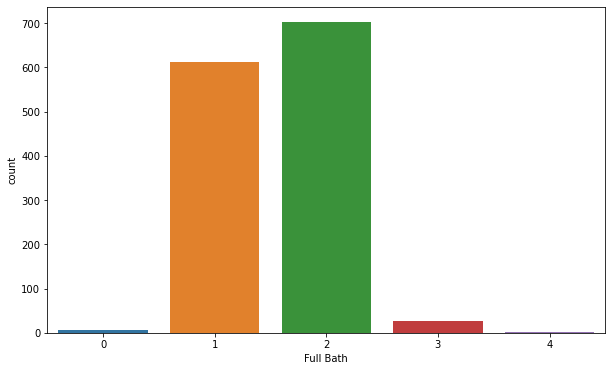

In [107]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Full Bath", data=df_train)
plt.show()

### Year Built

> 완공 연도

In [108]:
df_train['Year Built'].head()

0    2003
1    2006
2    1967
3    1900
4    2005
Name: Year Built, dtype: int64

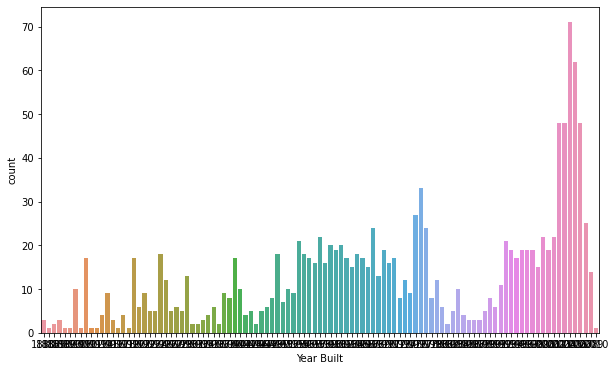

In [109]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Year Built", data=df_train)
plt.show()

### Year Remod/Add

> 리모델링 연도

In [110]:
df_train['Year Remod/Add'].head()

0    2003
1    2007
2    1967
3    2006
4    2005
Name: Year Remod/Add, dtype: int64

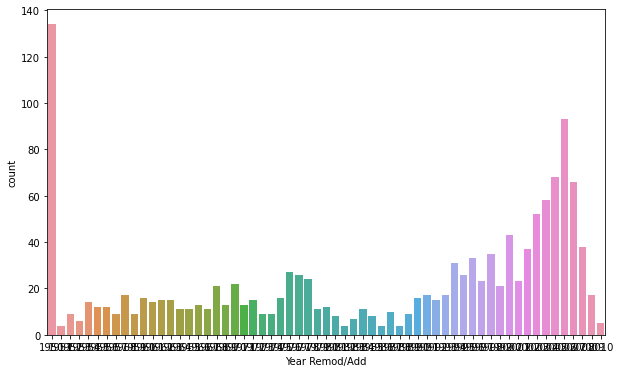

In [111]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Year Remod/Add", data=df_train)
plt.show()

### Garage Yr Blt

> 차고 완공 연도

In [98]:
df_train['Garage Yr Blt'].head()

0    2003
1    2006
2    1967
3    2000
4    2005
Name: Garage Yr Blt, dtype: int64

In [100]:
df_train['Garage Yr Blt'].value_counts()

2005    70
2006    53
2007    51
2004    50
2003    49
        ..
1931     1
1919     1
1918     1
1943     1
2010     1
Name: Garage Yr Blt, Length: 96, dtype: int64

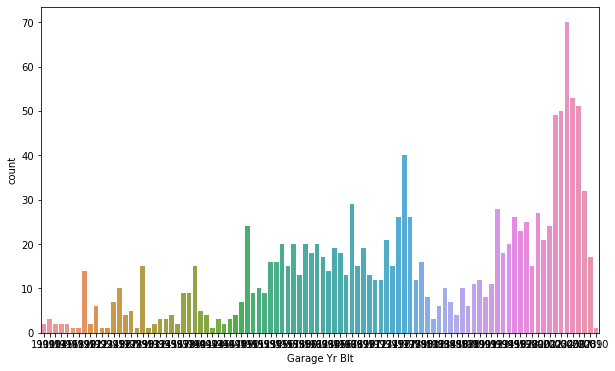

In [103]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Garage Yr Blt", data=df_train)
plt.show()

In [60]:
# 잘 못 기재된 듯 -> 삭제!
df_train[df_train['Garage Yr Blt'] >= 2100].index

Int64Index([254], dtype='int64')

In [61]:
df_train.drop(df_train[df_train['Garage Yr Blt'] >= 2100].index, axis=0, inplace=True)

### With target

- log target가 10.5 이하 제거

In [122]:
df_train.drop(df_train[df_train['target'] <= 10.5].index, axis=0, inplace=True)

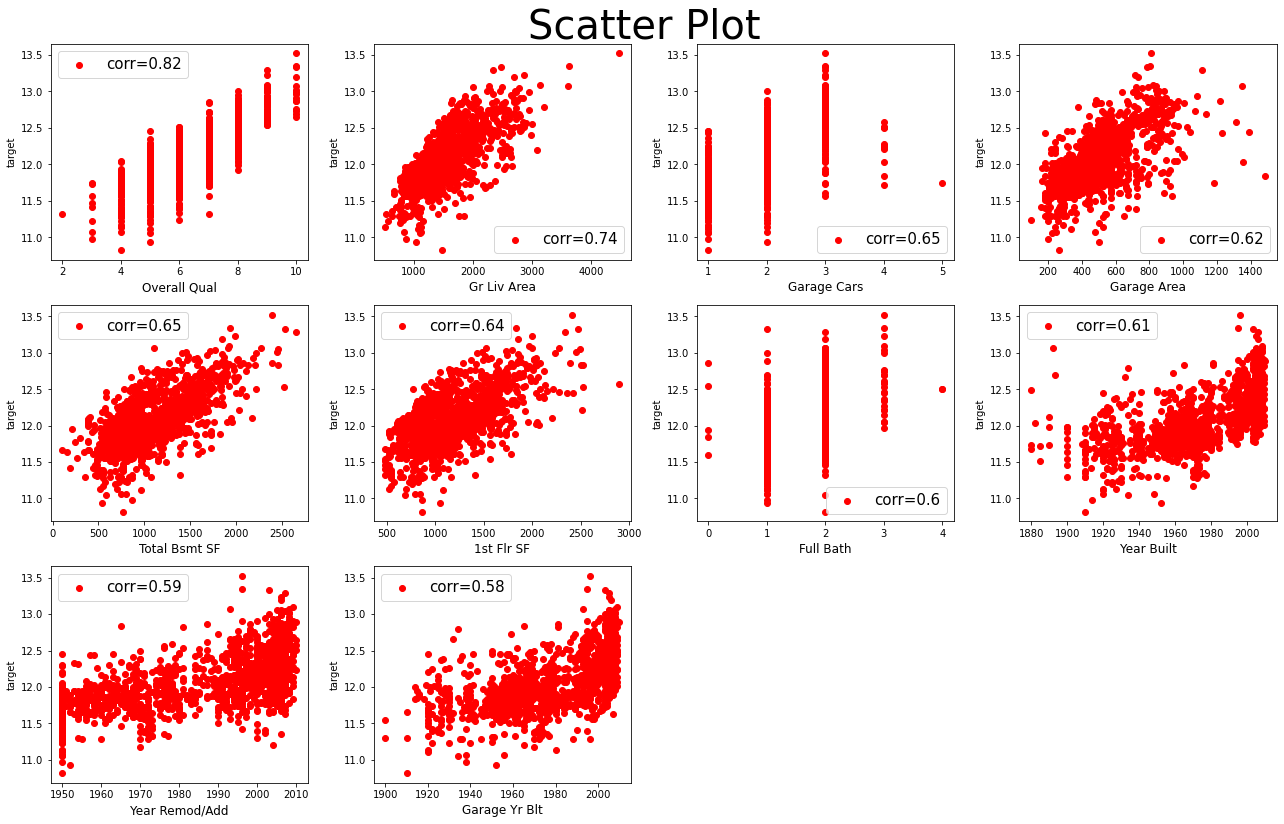

In [123]:
feature = numerical_feature
target = 'target'

plt.figure(figsize=(18,12))
plt.suptitle("Scatter Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    plt.xlabel(feature[i], fontsize=12)
    plt.ylabel(target, fontsize=10)
    corr_score = df_train[[feature[i],target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score>0 else 'blue'
    plt.scatter(df_train[feature[i]], df_train[target], color=c, label='corr={}'.format(corr_score))
    plt.legend(fontsize=15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

## Categorical Features

> Quality
- Ex : 	Excellent
- Gd :	Good
- TA : 	Average/Typical
- Fa :	Fair
- Po :	Poor

### Exter Qual

> 외관 재료 품질

In [125]:
df_train['Exter Qual'].value_counts()

TA    806
Gd    484
Ex     49
Fa      8
Name: Exter Qual, dtype: int64

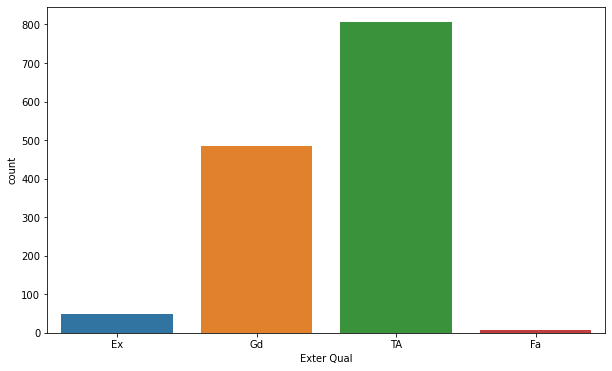

In [126]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Exter Qual", data=df_train)
plt.show()

### Kitchen Qual

> 부억 품질

In [127]:
df_train['Kitchen Qual'].value_counts()

TA    658
Gd    560
Ex    106
Fa     23
Name: Kitchen Qual, dtype: int64

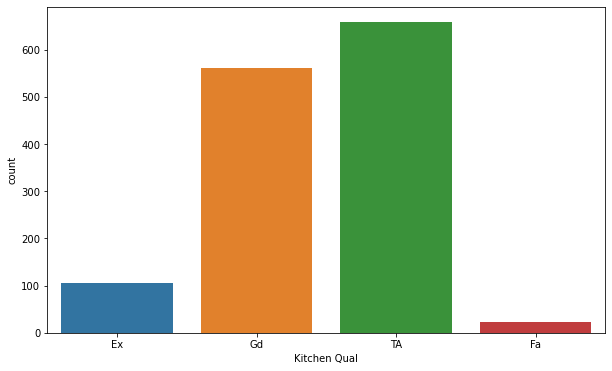

In [128]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Kitchen Qual", data=df_train)
plt.show()

### Bsmt Qual

> 지하실 높이

In [129]:
df_train['Bsmt Qual'].value_counts()

TA    604
Gd    581
Ex    134
Fa     27
Po      1
Name: Bsmt Qual, dtype: int64

In [197]:
df_train[df_train['Bsmt Qual'] == "Po"]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
65,4,1049,TA,1,195,TA,356,671,Po,1,1910,2000,1910,11.3


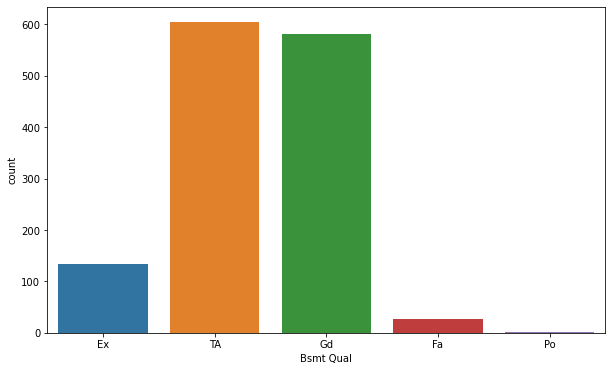

In [130]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x="Bsmt Qual", data=df_train)
plt.show()

### With target

In [162]:
categorical_feature

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')

<Figure size 432x432 with 0 Axes>

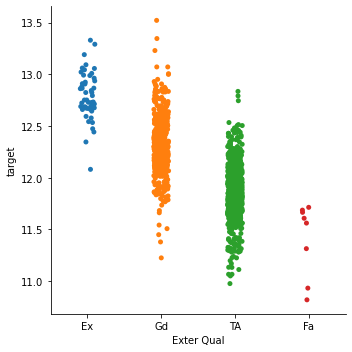

In [194]:
plt.figure(figsize=(6,6))
sns.catplot(x='Exter Qual', y=target, data=df_train)
plt.show()

<Figure size 432x432 with 0 Axes>

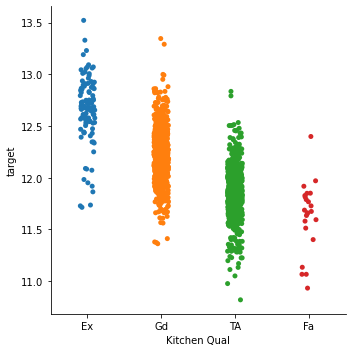

In [195]:
plt.figure(figsize=(6,6))
sns.catplot(x='Kitchen Qual', y=target, data=df_train)
plt.show()

<Figure size 432x432 with 0 Axes>

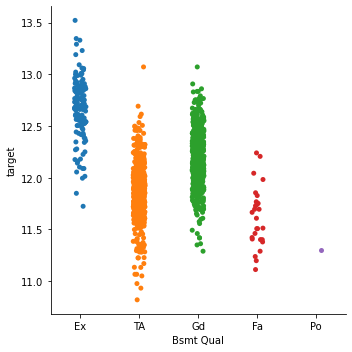

In [196]:
plt.figure(figsize=(6,6))
sns.catplot(x='Bsmt Qual', y=target, data=df_train)
plt.show()

# Feature Engineering